In [8]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
#import Contour_plot 
#from Contour_plot import ctr_plot

#Set data directory
data_dir = 'data/'


#Call SOCCOM data
#Full snapshot
SOCCOM = pd.read_pickle('data/SOCCOM_snapshot.pkl')
subset = pd.read_pickle('data/unique_subset.pkl')
SOCCOM_eddy = pd.read_pickle('data/SOCCOM_eddy_matchups.pkl')

#Define SOCCOM variables in simplier terms
DIC = 'DIC_LIAR[µmol/kg]'
TA = 'TALK_LIAR[µmol/kg]'
salinity = 'Salinity[pss]'
oxygen = 'Oxygen[µmol/kg]'
oxygen_sat = 'OxygenSat[%]'
nitrate = 'Nitrate[µmol/kg]'
chl_a = 'Chl_a_corr[mg/m^3]'
pH = 'pHinsitu[Total]'
pCO2 = 'pCO2_LIAR[µatm]'
lat = 'Lat [°N]'
lon = 'Lon [°E]'

FileNotFoundError: [Errno 2] No such file or directory: 'data/SOCCOM_snapshot.pkl'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 


def ctr_plot (df, df_eddy, float_ID, x_var, y_var, z_var,):
    """
    Parameters
    ----------
    df : pandas.dataframe
        ?
    df_eddy : pandas.dataframe
        ? 
    fload_ID : str
        The ID number of the float that 
    """
    
    #for k, value in kwargs.items():
        #if 
    
    # Create SOCCOM subset for given cruise #
    flt = df.loc[df['Cruise'] == float_ID]
    Subset = flt[pd.notna(df[z_var])]
    
    # Get eddy location
    eddy_ID_cyclonic = df_eddy.loc[
        (df_eddy['eddy_type'] != 0) & 
        (df_eddy['Cruise'] == float_ID) & 
        (df_eddy['eddy_type'] == -1)
    ]
    eddy_ID_anticyclonic = df_eddy.loc[(df_eddy['eddy_type'] != 0) & (df_eddy['Cruise'] == float_ID) & 
                                  (df_eddy['eddy_type'] == 1)]
    
    eddy_length_cyclonic = len(eddy_ID_cyclonic)
    eddy_y_cyclonic = [10] * eddy_length_cyclonic
    
    eddy_length_anticyclonic = len(eddy_ID_anticyclonic)
    eddy_y_anticyclonic = [10] * eddy_length_anticyclonic

    fig, ax = plt.subplots(1,1)
    
    ct = ax.tricontourf(Subset[x_var], Subset[y_var], Subset[z_var])
    plt.gca().invert_yaxis()
    
    cbar = fig.colorbar(ct)
    cbar.set_label(z_var, rotation=270, labelpad=15)
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    #plt.ylim(bottom = 1000)
    
    plt.scatter(
        Subset[x_var], 
        Subset['Depth[m]'], 
        s=0.25, 
        c='black', 
        alpha=0.1,
    ) 
    plt.scatter(eddy_ID_cyclonic[x_var], eddy_y_cyclonic, c='red', s =20)
    plt.scatter(eddy_ID_anticyclonic[x_var], eddy_y_anticyclonic, c='blue', s =20)
    
    #print(Subset)
    
    return plt.show(), eddy_ID_cyclonic, eddy_ID_anticyclonic



/var/folders/l9/7zbywdnj5_3448lb_wpzv3t40000gp/T/ipykernel_786/94022236.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Subset = flt[pd.notna(df[z_var])]


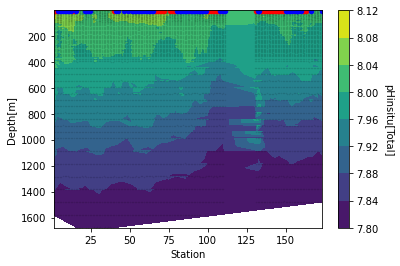

In [3]:
float_ID = 5904188
x_var = 'Station'
y_var = 'Depth[m]'
z_var = pH

test = ctr_plot(SOCCOM, SOCCOM_eddy, float_ID, x_var, y_var, z_var)


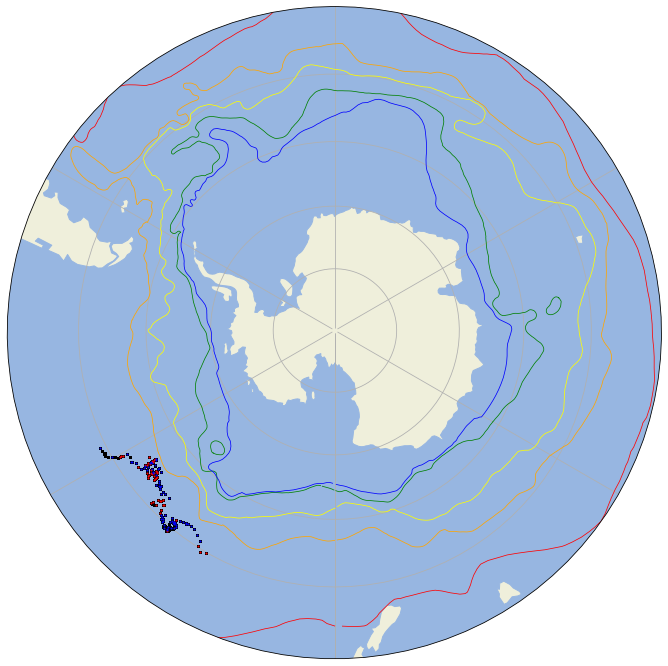

In [4]:
#Define orsi fronts
def load_orsi_fronts(data_dir):
    # Import the Southern Ocean fronts for mapping
    stf = pd.read_csv(data_dir + 'fronts/stf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saf = pd.read_csv(data_dir + 'fronts/saf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    pf = pd.read_csv(data_dir + 'fronts/pf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saccf = pd.read_csv(data_dir + 'fronts/saccf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    sbdy = pd.read_csv(data_dir + 'fronts/sbdy.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    
    return stf,saf,pf,saccf,sbdy

stf, saf, pf, saccf, sbdy = load_orsi_fronts(data_dir)


#Plot specific float

SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == float_ID]
eddy_ID_cyclonic = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) & (SOCCOM_eddy['Cruise'] == float_ID) & 
                                  (SOCCOM_eddy['eddy_type'] == -1)]
eddy_ID_anticyclonic = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) & (SOCCOM_eddy['Cruise'] == float_ID) & 
                                  (SOCCOM_eddy['eddy_type'] == 1)]

plt.figure(figsize =(12,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(ccrs.PlateCarree(), draw_labels=True)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform = ax.transAxes)
plt.plot(stf['lon'], stf['lat'], color='Red', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saf['lon'], saf['lat'], color='Orange', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(pf['lon'], pf['lat'], color='Yellow', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saccf['lon'], saccf['lat'], color='Green', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(sbdy['lon'], sbdy['lat'], color='Blue', transform=ccrs.PlateCarree(), linewidth=.75)


plt.scatter(SOCCOM_float['Lon [°E]'], SOCCOM_float['Lat [°N]'], color = 'Black', edgecolor = 'black', transform=ccrs.PlateCarree(), s=1, zorder=1001)
plt.scatter(eddy_ID_cyclonic['Lon [°E]'], eddy_ID_cyclonic['Lat [°N]'],c='red', edgecolor = 'red', transform=ccrs.PlateCarree(), s=1, zorder=1001)
plt.scatter(eddy_ID_anticyclonic['Lon [°E]'], eddy_ID_anticyclonic['Lat [°N]'],c='blue', edgecolor = 'blue', transform=ccrs.PlateCarree(), s=1, zorder=1001)

In [5]:
floatID_ed = SOCCOM_eddy['Cruise'].unique()  # cruise col is float_id

#ed = SOCCOM.loc[SOCCOM['Cruise'] == floatID_ed]
print(floatID_ed)

# Find float ID of a specific eddy_ID
#ed = SOCCOM.loc[SOCCOM['eddy_ID'] == float_number]

[5905997 5905370 5906006 5905071 5906307 5904761 5906227 5905639 5905369
 5904658 5906246 5905130 5904188 5904396 5906244 5905132 5906039 5904763
 5906225 5904683 5905995 5906218 5905073 5906305 5905372 5906004 5904687
 5906221 5904767 5905376 5906000 5905077 5905991 5904855 5904663 5906205
 5906318 5906207 5905134 5904857 5904661 5905109 5905075 5905374 5906002
 5905993 5906223 5904678 5904685 5904765 5906245 5905133 5904397 5905072
 5906304 5905373 5906040 5906005 5905994 5906219 5906224 5904682 5906226
 5905638 5905371 5906007 5905070 5906306 5905996 5904478 5904659 5906247
 5905131 5905368 5904395 5905069 5904660 5905108 5904856 5906206 5905135
 5904764 5906222 5904679 5904684 5905992 5905074 5905375 5906003 5905377
 5906001 5905076 5904766 5904467 5904686 5906220 5906319 5906204 5904662
 5904854 5904693 5905106 5904858 5904472 5906315 5906208 5904183 5905985
 5904841 5906030 5904677 5906211 5906213 5905078 5905379 5904469 5906032
 5904768 5904843 5904675 5904688 5906317 5904181 59

In [20]:
sel_flt = []

for f in floatID_ed:
    
    SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == f]  # get SOCCOM data for this float_id
    
    # check that there is enough float data in SOCCOM df
    has_enough_float_data = len(SOCCOM_float['Station']) >= 10
    
    # check len of eddy data too
    eddy_length = len(
        SOCCOM_eddy.loc[
            (SOCCOM_eddy['eddy_type'] != 0) & 
            (SOCCOM_eddy['Cruise'] == f)
        ]
    )
    has_enough_eddy_data = eddy_length >= 1
    
    # check that there is pH data at every point
    boolean_list = np.isnan(SOCCOM_float[pH])
    has_ph_data = all(boolean_list) == False
    
    if has_enough_float_data & has_enough_eddy_data & has_ph_data & (SOCCOM_eddy.eddy_ID.count() != 0):
        ID = f
        sel_flt.append(ID)    
        
print(sel_flt)

[5905997, 5905370, 5905071, 5904761, 5906227, 5905639, 5905369, 5904658, 5904188, 5904396, 5905132, 5904763, 5904683, 5905372, 5906004, 5904687, 5905376, 5906000, 5905077, 5904663, 5905134, 5904857, 5904661, 5905109, 5905075, 5905374, 5904678, 5904685, 5904765, 5904397, 5905373, 5906219, 5906224, 5904682, 5905638, 5905070, 5905996, 5904659, 5905131, 5905368, 5904395, 5904660, 5905108, 5904856, 5905135, 5906222, 5904679, 5904684, 5906003, 5905377, 5906001, 5905076, 5904766, 5904686, 5904662, 5904854, 5904693, 5904472, 5905985, 5904841, 5906030, 5906213, 5905078, 5905379, 5904469, 5906032, 5904768, 5904675, 5904470, 5904983, 5904185, 5905983, 5904474, 5904695, 5906217, 5904671, 5906036, 5904673, 5905998, 5904187, 5904657, 5904674, 5904842, 5905079, 5905105, 5906209, 5904984, 5904859, 5904473, 5905107, 5906008, 5906035, 5904860, 5905367, 5904186, 5904980, 5904477, 5904184, 5904982, 5906216]


In [21]:
# Testing if looking for repeat eddy ids works

sel_flt = []

for f in floatID_ed:

    SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == f]
    float_length = len(SOCCOM_float['Station'])
    eddyID = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) & (SOCCOM_eddy['Cruise'] == f)]
    eddy_length = len(eddyID)
    
    boolean_list = np.isnan(SOCCOM_float[pH])
    
    if (float_length >= 10) & (eddy_length >=1) & (all(boolean_list) == False):
        ID = f
        sel_flt.append(ID)    
print(sel_flt)

[5905997, 5905370, 5905071, 5904761, 5906227, 5905639, 5905369, 5904658, 5904188, 5904396, 5905132, 5904763, 5904683, 5905372, 5906004, 5904687, 5905376, 5906000, 5905077, 5904663, 5905134, 5904857, 5904661, 5905109, 5905075, 5905374, 5904678, 5904685, 5904765, 5904397, 5905373, 5906219, 5906224, 5904682, 5905638, 5905070, 5905996, 5904659, 5905131, 5905368, 5904395, 5904660, 5905108, 5904856, 5905135, 5906222, 5904679, 5904684, 5906003, 5905377, 5906001, 5905076, 5904766, 5904686, 5904662, 5904854, 5904693, 5904472, 5905985, 5904841, 5906030, 5906213, 5905078, 5905379, 5904469, 5906032, 5904768, 5904675, 5904470, 5904983, 5904185, 5905983, 5904474, 5904695, 5906217, 5904671, 5906036, 5904673, 5905998, 5904187, 5904657, 5904674, 5904842, 5905079, 5905105, 5906209, 5904984, 5904859, 5904473, 5905107, 5906008, 5906035, 5904860, 5905367, 5904186, 5904980, 5904477, 5904184, 5904982, 5906216]


In [ ]:
# Breaking Down for loop

SOCCOM_float = (SOCCOM.loc[SOCCOM['Cruise'] == float_ID])

float_length = len(SOCCOM_float['Station'])

if float_length >= 20:
    print(True)
            
eddy_ID = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) & (SOCCOM_eddy['Cruise'] == float_ID)]
eddy_length = len(eddy_ID)

if eddy_length>=2:
    print(True)
    
boolean_list = np.isnan(SOCCOM_float[pH])
if all(boolean_list) == False :
    print("yes")
    
if (count(SOCCOM_eddy.eddy_ID) != 0)

In [13]:
sel_flt = []

for f in floatID_ed:

    SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == f]
    float_length = len(SOCCOM_float['Station'])
    eddy_ID = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) & (SOCCOM_eddy['Cruise'] == f)]
    eddy_length = len(eddy_ID)
    
    boolean_list = np.isnan(SOCCOM_float[pH])
    
    if (float_length >= 10) & (eddy_length >=1) & (all(boolean_list) == False):
        continue 
        if (SOCCOM_float[lat]>= pf['lat']): #& SOCCOM_float[lat]< pf['lat']):
            print('yes')
            

In [9]:
pf['lat']

0        NaN
1     -61.71
2     -61.54
3     -61.42
4     -61.31
       ...  
965   -62.40
966   -62.31
967   -62.16
968   -61.95
969      NaN
Name: lat, Length: 970, dtype: float64

In [11]:
sel_flt = []

for f in floatID_ed:

    SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == f]
    float_length = len(SOCCOM_float['Station'])
    
    for f in SOCCOM_float:
        if (SOCCOM_float[lon]== pf['lon']): #& SOCCOM_float[lat]< pf['lat']):
            print('yes')

ValueError: Can only compare identically-labeled Series objects

In [12]:
SOCCOM_float[lat]

2505750   -62.487
2505751   -62.487
2505752   -62.487
2505753   -62.487
2505754   -62.487
            ...  
2516802   -62.496
2516803   -62.496
2516804   -62.496
2516805   -62.496
2516806   -62.496
Name: Lat [°N], Length: 11057, dtype: float64